In [1]:
import pathlib
from pathlib import Path
import json
import numpy as np
import tensorflow as tf

import classification_module 

%load_ext autoreload
%autoreload 2


2025-10-31 09:24:22.443972: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
# Configuration
classification_model_name = "classification_model"
CSV_DIR = r"/home/ari/Documents/Onion_Sensor/data"
SAMPLING_RATE = 1600
VALIDATION_SPLIT = 0.2
LEARNING_RATE = 0.001
Classification_EPOCHS = 10  
REGRESSION_EPOCHS = 3000
PATIENCE = 2
SEED = 42
TEST_SPLIT = 0.1

In [3]:
classification_module.preprocess_csv_to_wav(
        csv_dir=CSV_DIR,
        model_name=classification_model_name,
        sampling_rate=SAMPLING_RATE
    )

I0000 00:00:1761920666.197539   58795 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2787 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5
✓ WAV files: /home/ari/Documents/Onion_Sensor/models/classification_model/wave_files/wave_files_v1
✓ Preprocessing complete: 1.1s


In [4]:
classification_module.load_and_preprocess_data(
    model_name=classification_model_name,
    validation_split=VALIDATION_SPLIT,
    seed=SEED
)

Found 144 files belonging to 2 classes.
Using 116 files for training.
Using 28 files for validation.


✓ Dataset metadata: /home/ari/Documents/Onion_Sensor/models/classification_model/metadata/dataset_info.json
✓ Dataset details:
 - Input shape: [124, 129, 1]
 - Number of labels: 2
 - Label names: ['point', 'uniform']
✓ Data preprocessing complete: 1.4s


In [5]:
classification_module.build_and_compile_model(
    model_name=classification_model_name,
    learning_rate=LEARNING_RATE
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 32, 32, 1)      │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,837 (6.20 MB)

 Trainable params: 1,624,834 (6.20 MB)

 Non-trainable params: 3 (16.00 B)

✓ Model built: /home/ari/Documents/Onion_Sensor/models/classification_model/models/untrained/model.keras
✓ Model build complete: 0.7s


/home/ari/Documents/Onion_Sensor/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-10-31 09:25:10.185114: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


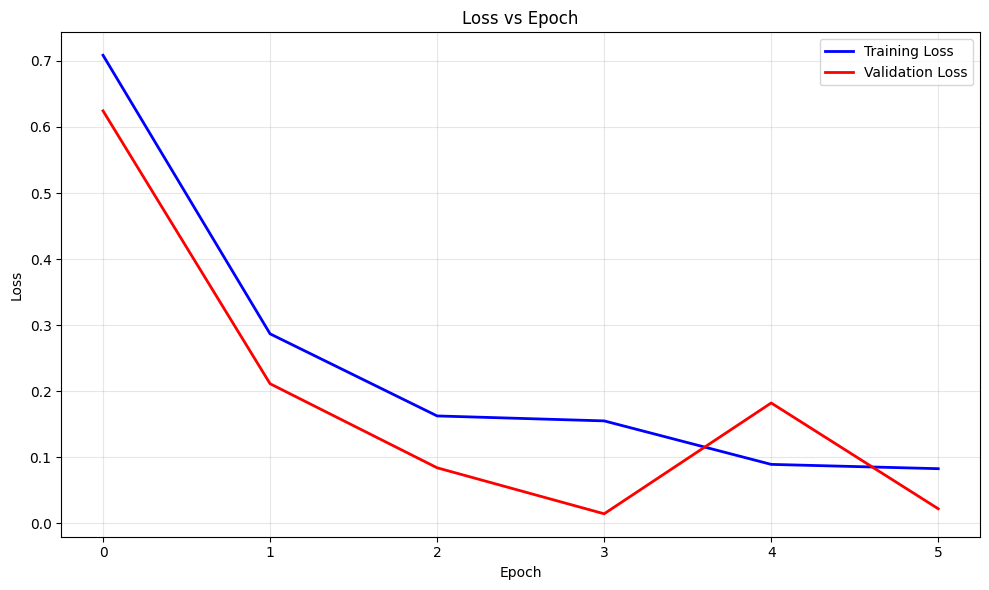

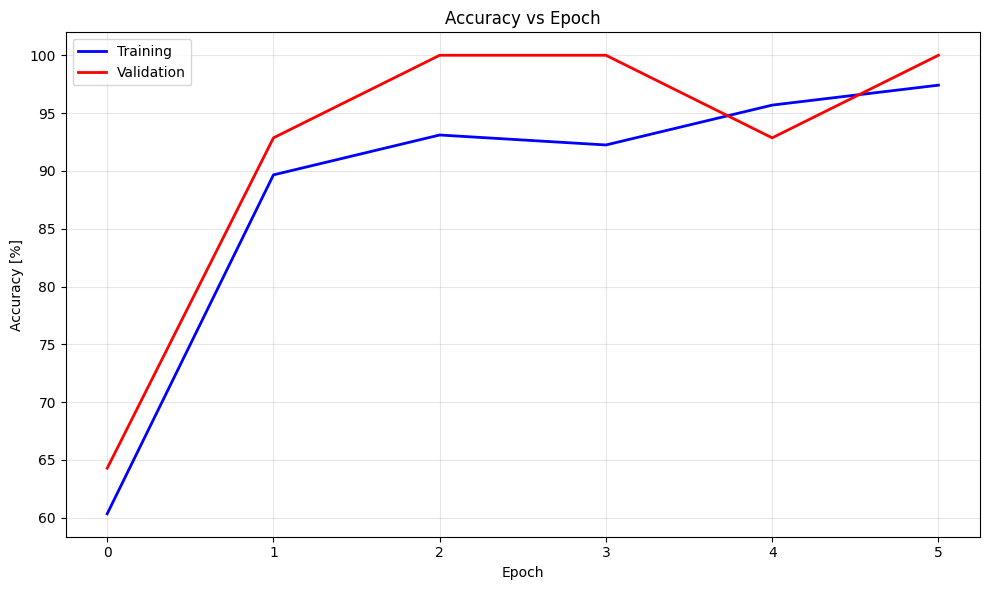

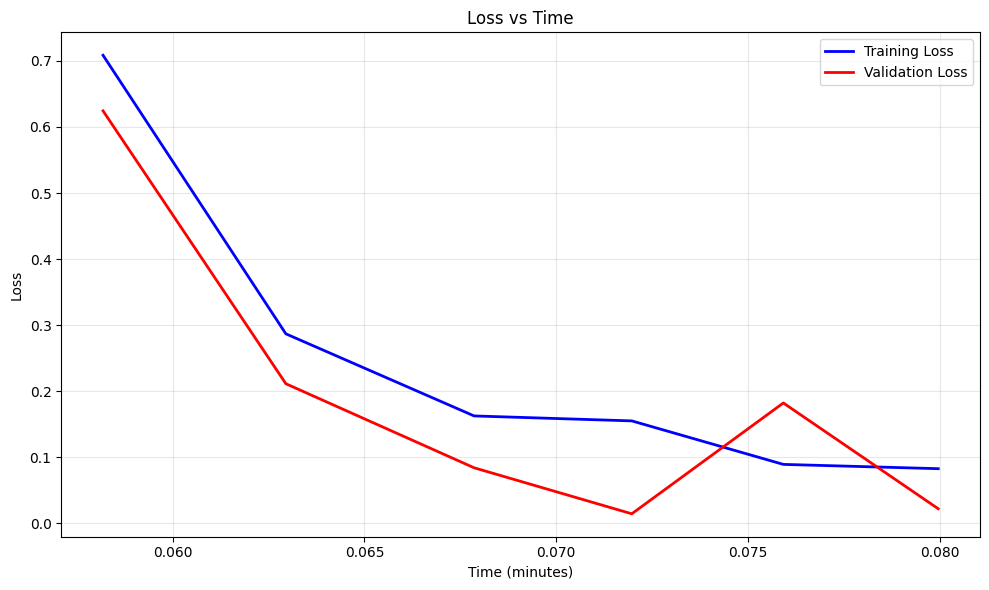

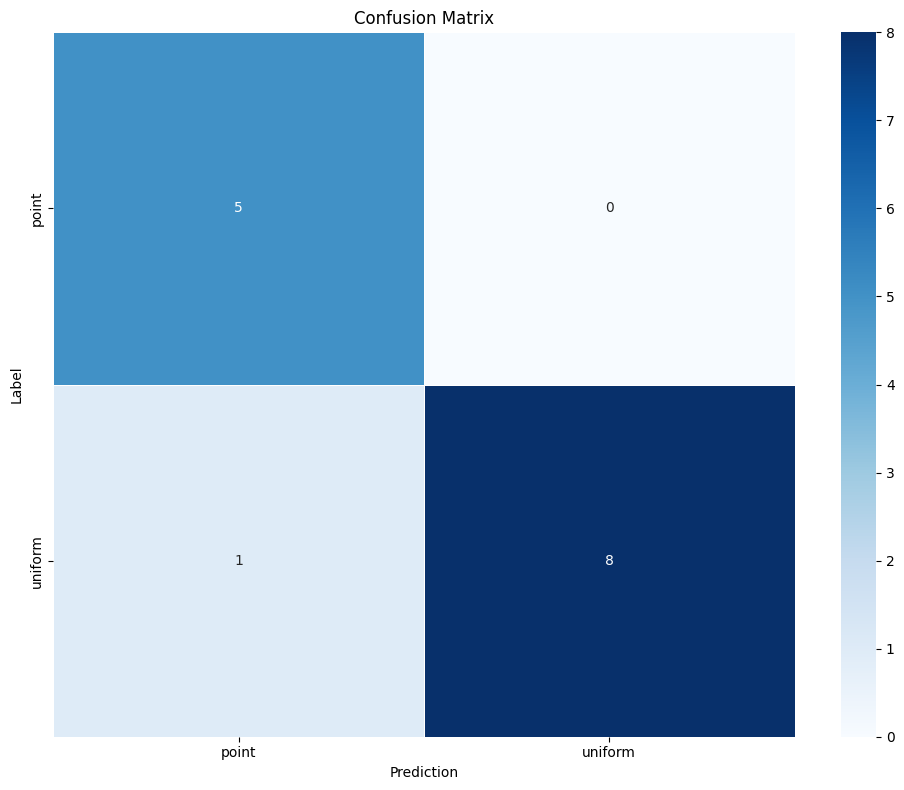

✓ Trained model: /home/ari/Documents/Onion_Sensor/models/classification_model/models/trained/model.keras
✓ Training plots: /home/ari/Documents/Onion_Sensor/models/classification_model/training/plots
✓ Training summary: /home/ari/Documents/Onion_Sensor/models/classification_model/training/training_summary.json
✓ Test accuracy: 92.9%
✓ Training complete: 7.7s


In [8]:
classification_module.train_and_evaluate_model(
    model_name=classification_model_name,
    epochs=Classification_EPOCHS,
    patience=PATIENCE
)

In [7]:
classification_module.create_export_model(model_name=classification_model_name)

INFO:tensorflow:Assets written to: /home/ari/Documents/Onion_Sensor/models/classification_model/export/saved_model/assets


Assets written to: /home/ari/Documents/Onion_Sensor/models/classification_model/export/saved_model/assets
✓ Registry updated: /home/ari/Documents/Onion_Sensor/models.json
✓ Export model: /home/ari/Documents/Onion_Sensor/models/classification_model/export/saved_model
✓ Export complete: 1.1s


In [37]:
import regression_module

regression_model_name = "regression_model"

In [38]:
regression_module.preprocess_csv_data(
    csv_dir=CSV_DIR,
    model_name=regression_model_name,
    sampling_rate=SAMPLING_RATE,
    validation_split=VALIDATION_SPLIT,
    test_split=TEST_SPLIT,
    seed=SEED
)

OK Dataset metadata: /home/ari/Documents/Onion_Sensor/models/regression_model/metadata/dataset_info.json
OK Preprocessing complete: 0.9s


In [39]:
# Step 2: Build model
regression_module.build_and_compile_model(
    model_name=regression_model_name,
    hidden_layers=[64, 64, 32, 16],
    learning_rate=LEARNING_RATE
)

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_normalization  │ (None, 1)         │          3 │ deep_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_hidden_1       │ (None, 64)        │        128 │ deep_normalizati… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_hidden_2       │ (None, 64)        │      4,160 │ deep_hidden_1[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_hidden_3       │ (None, 32)        │      2,080 │ deep_hidden_2[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_normalization  │ (None, 1)         │          3 │ wide_input[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_hidden_4       │ (None, 16)        │        528 │ deep_hidden_3[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_deep_concat    │ (None, 17)        │          0 │ wide_normalizati… │
│ (Concatenate)       │                   │            │ deep_hidden_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         18 │ wide_deep_concat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,920 (27.04 KB)

 Trainable params: 6,914 (27.01 KB)

 Non-trainable params: 6 (32.00 B)

OK Model built: /home/ari/Documents/Onion_Sensor/models/regression_model/models/untrained/model.keras
OK Model build complete: 0.1s


/home/ari/Documents/Onion_Sensor/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


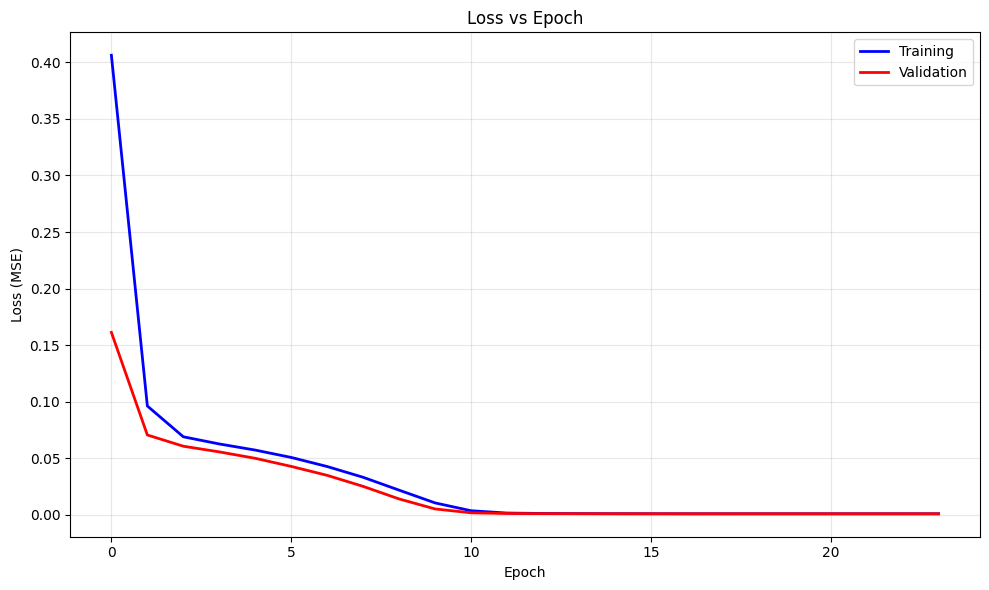

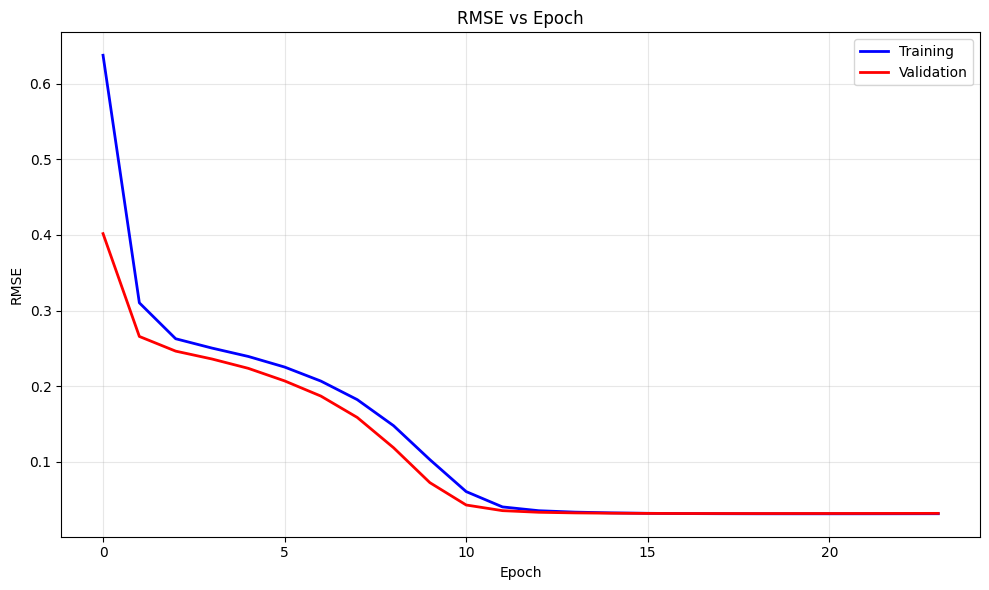

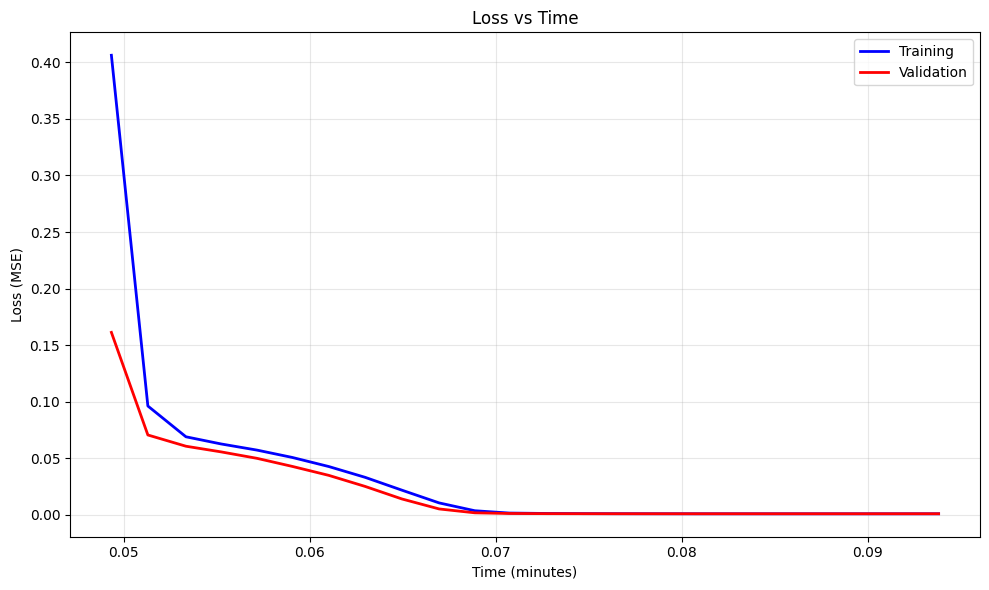

OK Trained model: /home/ari/Documents/Onion_Sensor/models/regression_model/models/trained/model.keras
OK Training plots: /home/ari/Documents/Onion_Sensor/models/regression_model/training/plots
OK Training summary: /home/ari/Documents/Onion_Sensor/models/regression_model/training/training_summary.json
OK Test RMSE: 0.037131
OK Training complete: 9.1s


In [40]:

regression_module.train_and_evaluate_model(
    model_name=regression_model_name,
    epochs=REGRESSION_EPOCHS,
    patience=5
)

In [41]:
regression_module.create_export_model(model_name=regression_model_name)

INFO:tensorflow:Assets written to: /home/ari/Documents/Onion_Sensor/models/regression_model/export/saved_model/assets


Assets written to: /home/ari/Documents/Onion_Sensor/models/regression_model/export/saved_model/assets
OK Registry updated: /home/ari/Documents/Onion_Sensor/models.json
OK Export model: /home/ari/Documents/Onion_Sensor/models/regression_model/export/saved_model
OK Export complete: 0.5s
